<a href="https://colab.research.google.com/github/sumanrbt/SP-Cup-2020/blob/master/LSTM_autoencoder_angular_velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/SP CUP 2020/SP Cup"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The two folders folders_norm and forlders_abnorm contain the paths to the 6 normal imu data and 6 abnormal imu data.

In [116]:
ls "/content/drive/My Drive/SP CUP 2020/SP Cup"

 01_Initial_dataset_with_no_abnormalities/
 02_Initial_dataset_with_abnormalities/
'03_Dataset with 5 normal experiments_17Jan2020'/
'04_Dataset with 5 abnormal experiments_17Jan2020'/


In [0]:
folders_norm=["/content/drive/My Drive/SP CUP 2020/SP Cup/01_Initial_dataset_with_no_abnormalities/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-32-12/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-32-49/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-33-26/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-34-08/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/03_Dataset with 5 normal experiments_17Jan2020/2020-01-17-11-34-43/_slash_mavros_slash_imu_slash_data.csv"]
folders_abnorm=["/content/drive/My Drive/SP CUP 2020/SP Cup/02_Initial_dataset_with_abnormalities/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-35-27/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-36-03/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-36-43/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-37-25/_slash_mavros_slash_imu_slash_data.csv","/content/drive/My Drive/SP CUP 2020/SP Cup/04_Dataset with 5 abnormal experiments_17Jan2020/2020-01-17-11-38-07/_slash_mavros_slash_imu_slash_data.csv"]

### IMPORTS

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Normal IMU data

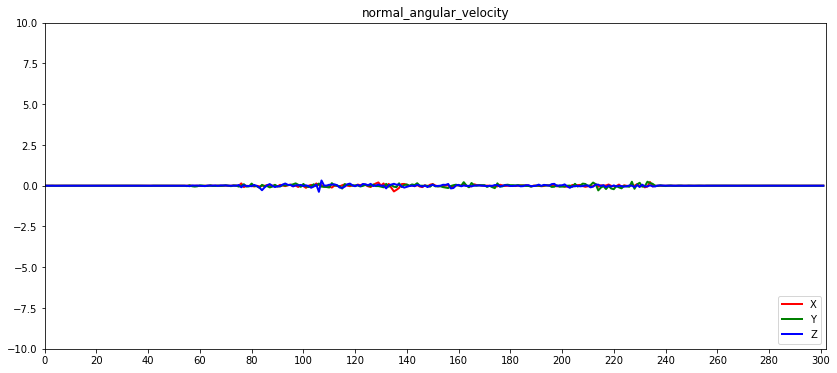

In [119]:
n=0

data_dir = folders_norm[n]
df=pd.read_csv(data_dir)
#print(df.columns)
angular_velocity = pd.DataFrame()
for i in range(len(df)):
    x=df["x.1"][i]
    y=df["y.1"][i]
    z=df["z.1"][i]
    av=np.array([x,y,z])
    av_df=pd.DataFrame(av.reshape(1,3))
    av_df.index=[str(i)]
    angular_velocity=angular_velocity.append(av_df)
    
angular_velocity.columns=["X","Y","Z"]
fig=plt.figure(figsize=(14,6))
plt.axis([0,len(df),-10,10])

plt.plot(angular_velocity["X"],label="X",linewidth=2,color="red")
plt.plot(angular_velocity["Y"],label="Y",linewidth=2, color="green")
plt.plot(angular_velocity["Z"],label="Z",linewidth=2, color="blue")
plt.legend(loc='lower right')
plt.title("normal_angular_velocity")
plt.xticks(np.arange(0,len(angular_velocity) , step=20));

In [120]:
angular_velocity

,X,Y,Z
0,0.000214,0.000151,0.002010
1,-0.001187,-0.000858,-0.001256
2,0.001719,-0.001543,-0.001125
3,0.000330,0.000270,0.001531
4,0.000994,-0.000740,-0.003595
...,...,...,...
297,0.000646,-0.001566,0.000103
298,-0.001664,-0.001569,0.000342
299,-0.000392,0.001743,-0.000589
300,-0.000715,0.000194,0.000266


In [0]:
z=np.array(angular_velocity)
x_train=z.reshape(len(angular_velocity),1,3)

### LSTM Auto_Encoder Building

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import load_model

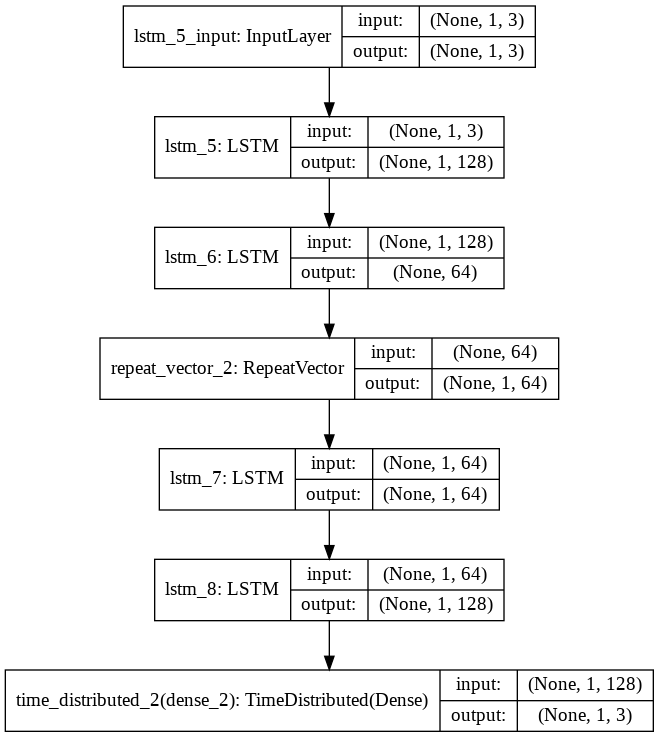

In [123]:
time_step=1
n_features=3
model=Sequential()
model.add(LSTM(128,activation="tanh",batch_input_shape=(None,time_step,n_features),return_sequences=True))
model.add(LSTM(64,activation="tanh",batch_input_shape=(None,time_step,n_features),return_sequences=False))
model.add(RepeatVector(1))
model.add(LSTM(64,activation="tanh",batch_input_shape=(None,time_step,n_features),return_sequences=True))
model.add(LSTM(128,activation="tanh",batch_input_shape=(None,time_step,n_features),return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
#model.summary()
from keras.utils import plot_model
plot_model(model, to_file='LSTM_autoencoder_model.png', show_shapes=True,show_layer_names=True)

In [124]:
model.compile(optimizer="adam",loss="mse")
model.fit(x_train,x_train,epochs=200)

Epoch 1/200
302/302 [==============================] - 10s 34ms/step - loss: 0.0031
Epoch 2/200
302/302 [==============================] - 0s 575us/step - loss: 0.0031
Epoch 3/200
302/302 [==============================] - 0s 578us/step - loss: 0.0031
Epoch 4/200
302/302 [==============================] - 0s 581us/step - loss: 0.0031
Epoch 5/200
302/302 [==============================] - 0s 572us/step - loss: 0.0031
Epoch 6/200
302/302 [==============================] - 0s 592us/step - loss: 0.0031
Epoch 7/200
302/302 [==============================] - 0s 598us/step - loss: 0.0031
Epoch 8/200
302/302 [==============================] - 0s 571us/step - loss: 0.0031
Epoch 9/200
302/302 [==============================] - 0s 585us/step - loss: 0.0031
Epoch 10/200
302/302 [==============================] - 0s 596us/step - loss: 0.0030
Epoch 11/200
302/302 [==============================] - 0s 614us/step - loss: 0.0028
Epoch 12/200
302/302 [==============================] - 0s 600us/step - lo

(302, 1, 3)


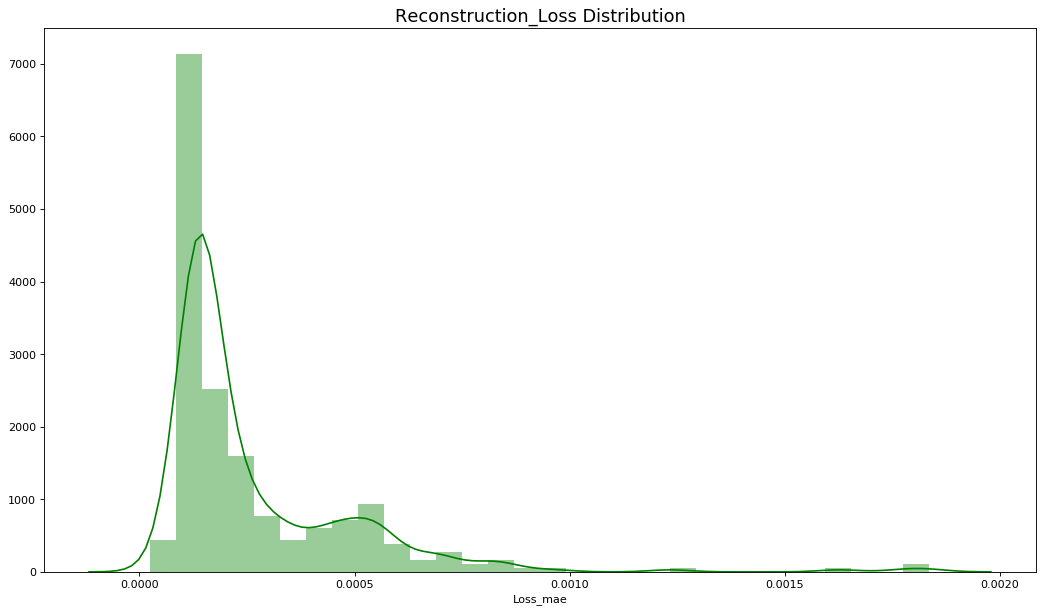

In [125]:
import seaborn as sns
x_pred = model.predict(x_train)
x_pred = x_pred.reshape(x_pred.shape[0], x_pred.shape[2])
x_pred = pd.DataFrame(x_pred, columns=angular_velocity.columns)
x_pred.index = angular_velocity.index

scored = pd.DataFrame(index=angular_velocity.index)
X_train = x_train.reshape(x_train.shape[0], x_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(x_pred-X_train), axis = 1)

plt.figure(figsize=(16,9), dpi=80)
#plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Reconstruction_Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins =30, kde= True, color = 'green');

print(x_train.shape)

## Load the abnormal IMU data

([<matplotlib.axis.XTick at 0x7f2b3b8bf748>,
 <a list of 4 Text xticklabel objects>)

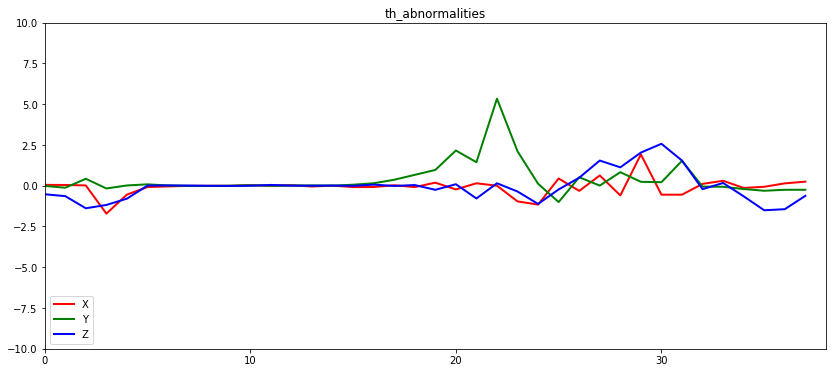

In [126]:
m=0
data_dir_ab = folders_abnorm[m]
df_ab=pd.read_csv(data_dir_ab)

angular_velocity_ab = pd.DataFrame()
for i in range(len(df_ab)):
    x=df_ab["x.1"][i]
    y=df_ab["y.1"][i]
    z=df_ab["z.1"][i]
    la=np.array([x,y,z])
    la_df=pd.DataFrame(la.reshape(1,3))
    la_df.index=[str(i)]
    angular_velocity_ab=angular_velocity_ab.append(la_df)
    
angular_velocity_ab.columns=["X","Y","Z"]
    
fig=plt.figure(figsize=(14,6))

plt.axis([0,len(df_ab),-10,10])
plt.plot(angular_velocity_ab["X"],label="X",linewidth=2,color="red")
plt.plot(angular_velocity_ab["Y"],label="Y",linewidth=2, color="green")
plt.plot(angular_velocity_ab["Z"],label="Z",linewidth=2, color="blue")
plt.legend(loc='lower left')
plt.title(folders_abnorm[m][64:-39])
plt.xticks(np.arange(0,len(angular_velocity_ab) , step=10))

#plt.savefig(folders_abnorm[m][:-38]+"angular_velocity.png")
#plt.savefig(folders_abnorm[m][:-38]+"angular_velocity.png")

In [0]:
y=np.array(angular_velocity_ab)

In [0]:
x_test=y.reshape(len(angular_velocity_ab),1,3)

In [129]:
print(len(angular_velocity_ab))

38


In [0]:
model.save("angular_velocity_abnormality_model")

0.0001373267732668017


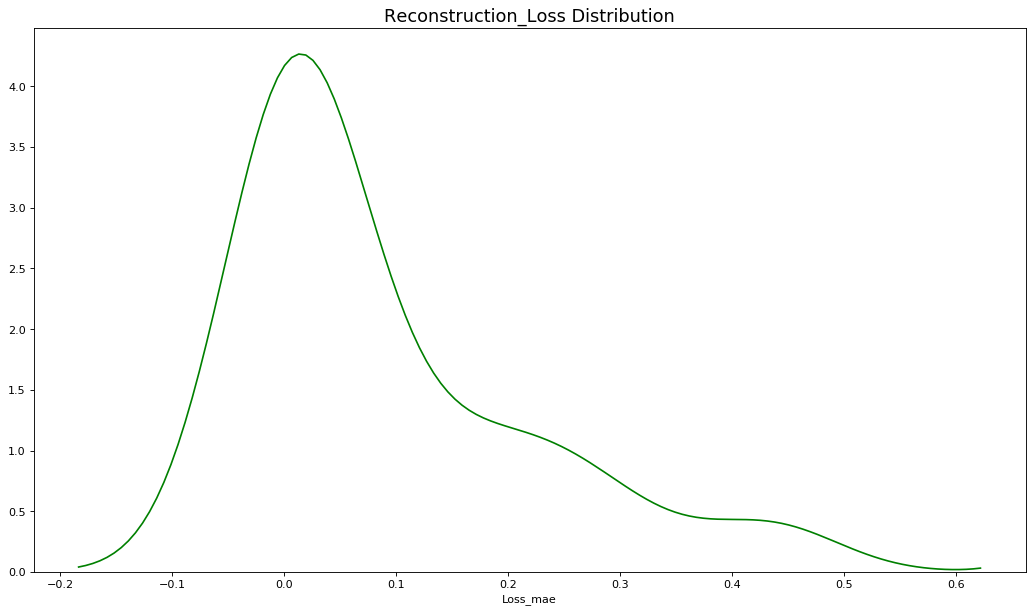

In [131]:
model=load_model("angular_velocity_abnormality_model.hdf5")
x_ab=x_test
x_pred_ab = model.predict(x_ab)
x_pred_ab = x_pred_ab.reshape(x_pred_ab.shape[0], x_pred_ab.shape[2])
x_pred_ab= pd.DataFrame(x_pred_ab, columns=angular_velocity_ab.columns)
x_pred_ab.index = angular_velocity_ab.index
x_pred_ab.head()
scored_ab = pd.DataFrame(index=angular_velocity_ab.index)
x_ab = x_ab.reshape(x_ab.shape[0], x_ab.shape[2])
scored_ab['Loss_mae'] = np.mean(np.abs(x_pred_ab-x_ab), axis = 1)

plt.figure(figsize=(16,9), dpi=80)
#plt.xticks(np.arange(0, 1, step=0.05),fontsize=6)
plt.title('Reconstruction_Loss Distribution', fontsize=16)
filtered = scored_ab['Loss_mae'][(scored_ab['Loss_mae'] >= 0) & (scored_ab['Loss_mae'] < 0.56)]
j=sns.distplot(filtered, bins =30, hist=False,kde= True, color = 'green');
print(min(scored_ab["Loss_mae"]))

In [132]:
print(j)

AxesSubplot(0.125,0.125;0.775x0.755)


In [0]:
bins=1
bin_width=(max(scored_ab['Loss_mae'])-min(scored_ab['Loss_mae']))/bins
hist, edges = np.histogram(
    scored_ab['Loss_mae'],
    bins=bins,
    range=(0, 0.0005),#bin_width*bins/2),
    density=False)

In [134]:
hist

array([11])

In [135]:
bi=np.linspace(0,bin_width*bins,bins)
print(bi)

[0.]


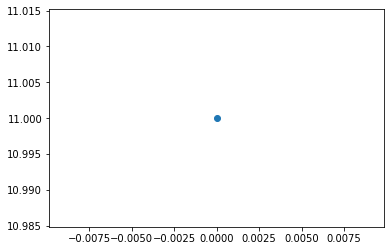

In [136]:
for i,j in zip(bi,hist):
    plt.scatter(i,j)

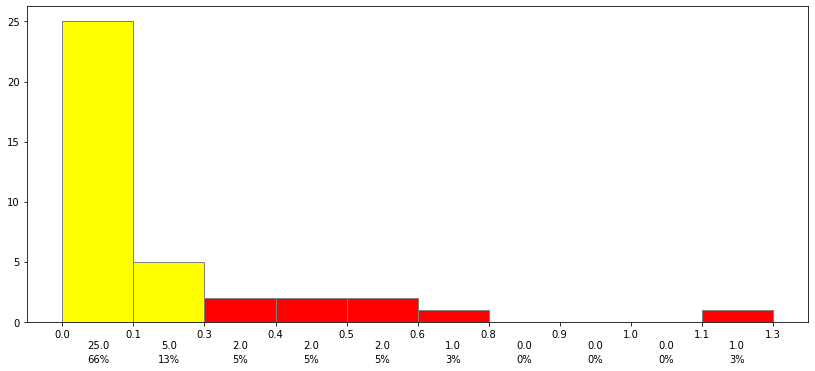

In [137]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

data = scored_ab['Loss_mae']
fig, ax = plt.subplots(figsize=(14,6))
counts, bins, patches = ax.hist(data,facecolor='yellow', edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.show()